<a href="https://colab.research.google.com/github/ChitrarthVasdev/CODSOFT/blob/main/salesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 4: SALES PREDICTION OF DIFFERENT PRODUCTS

MADE BY: CHITRARTH VASDEV

DOMAIN: DATA SCIENCE

MODEL USED: RANDOM FOREST REGRESSOR

LANGUAGE : PYTHON

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/content/advertising.csv")
display(df)



,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [10]:
# Define features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation
print("Random Forest Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)



Random Forest Model Evaluation:
Mean Squared Error: 1.44
R² Score: 0.9535


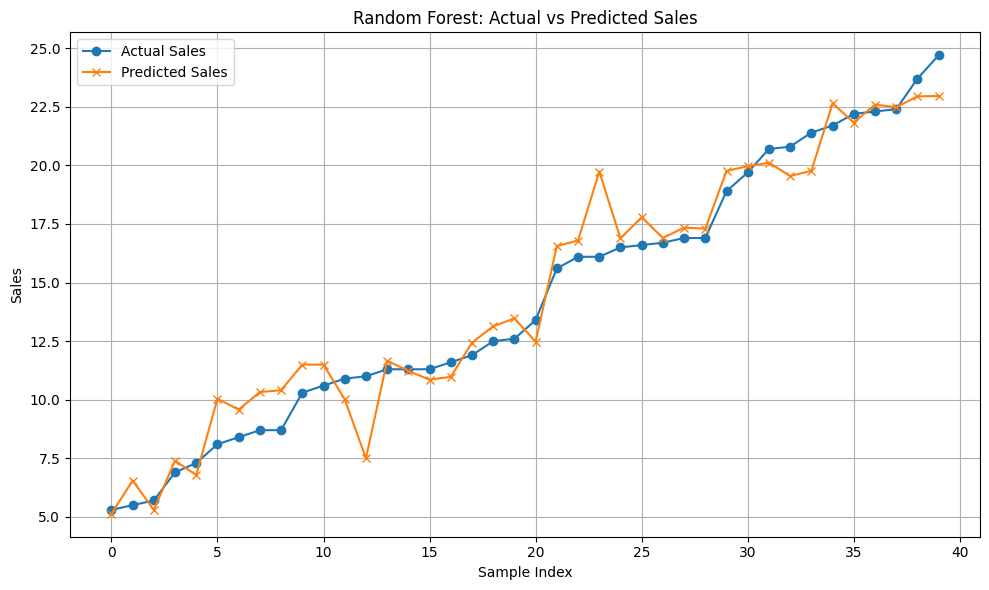

In [11]:
# Plot Actual vs Predicted
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).sort_values(by='Actual').reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(results_df['Actual'], label='Actual Sales', marker='o')
plt.plot(results_df['Predicted'], label='Predicted Sales', marker='x')
plt.title('Random Forest: Actual vs Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




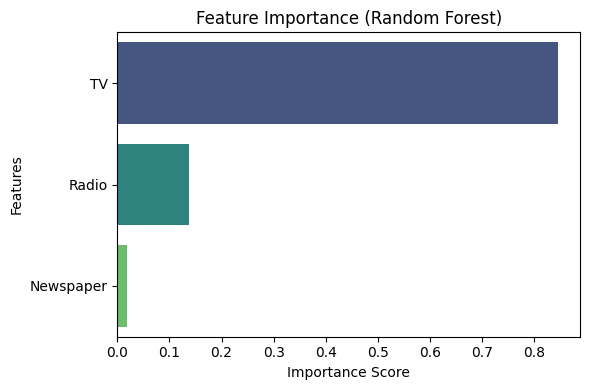

In [ ]:
# Plot feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x=importances.values, y=importances.index, hue=importances.index, palette="viridis", legend=False)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()